In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [135]:
train_data = pd.read_excel('Data_Train.xlsx')

In [136]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [137]:
train_data.shape

(10683, 11)

In [138]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [139]:
train_data.dropna(inplace=True)

In [140]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [141]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [142]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [143]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [144]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [145]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month

In [146]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-08 05:50:00,2022-01-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-08 18:05:00,2022-01-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-08 16:50:00,2022-01-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [147]:
# Since we have converted Date_of_Journey column into integers. Now we can drops as it is no use. 
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [148]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
def extract_minute(df,col):
    df[col+'_minute'] = df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [149]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [150]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [151]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Apply pre-processing on duration column,separate duration hours and minutes from duration

In [152]:
duration = list(train_data['Duration'])                              

In [153]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                        #check if duration contains only hour
            duration[i] = duration[i] + ' 0m'         #adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]         #if duration contains only minute, adds 0 hour

In [154]:
train_data['Duration'] = duration

In [155]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [156]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [157]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [158]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [159]:
drop_column(train_data,'Duration')

In [160]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [161]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [162]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [163]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [164]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='object']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data

In [165]:
categorical = train_data[cat_col]

In [166]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [167]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline VS Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

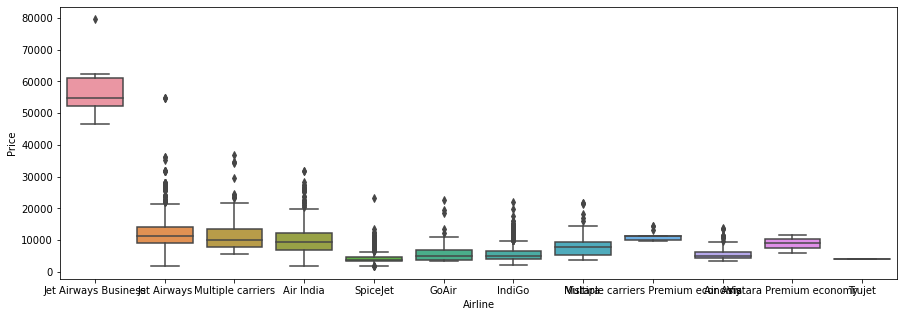

In [168]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

##### Conclusion: From graph we can see that Jet Airways Business have the highest price, the others almost all are having similar median

### Perform Total_stops VS Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

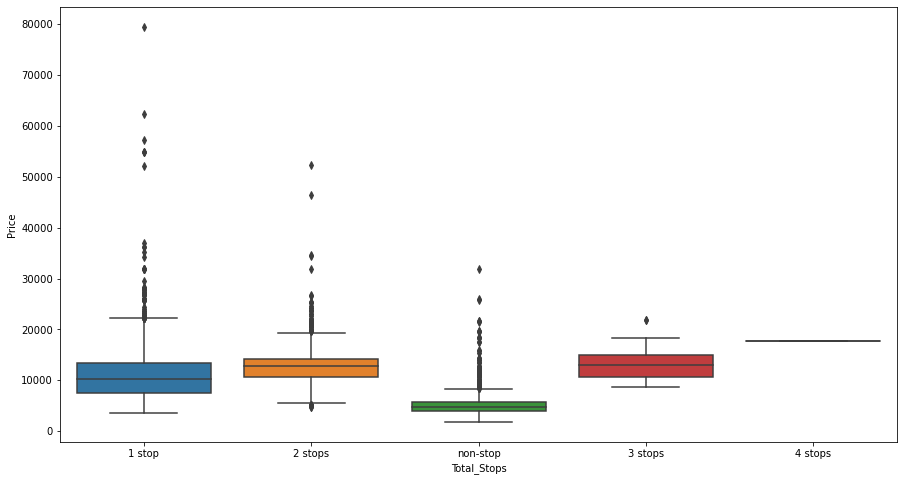

In [169]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [170]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = pd.get_dummies(categorical['Airline'],drop_first = True)

In [171]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [172]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source VS Price Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

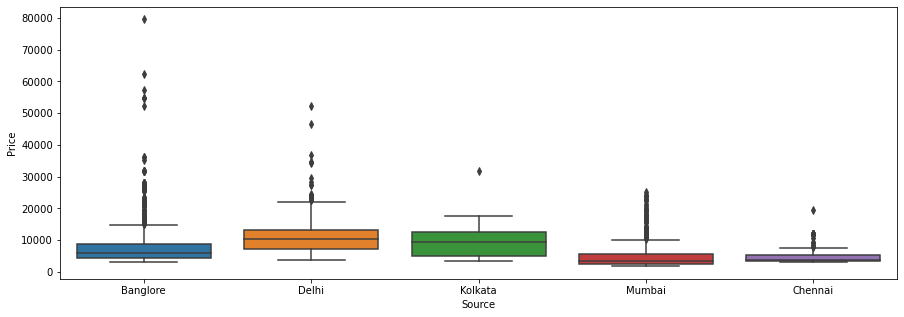

In [173]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [174]:
Source = pd.get_dummies(categorical['Source'],drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [175]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### Destination VS Price Analysis

<AxesSubplot:xlabel='Destination', ylabel='Price'>

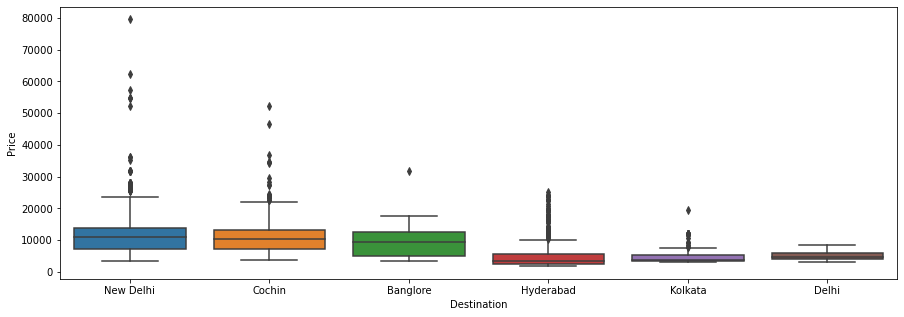

In [176]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [177]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [178]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-178-4d2e7a50b43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-178-4d2e7a50b43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-178-4d2e7a50b43c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [179]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [180]:
drop_column(categorical,'Route')

C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [182]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [183]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [184]:
#now extract how many categories in each cat_feature
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


##### As you see, Route have lots of features, onehotencoding is not a good choice, so apply Label Encoding

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
encoder = LabelEncoder()

In [187]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-187-b90dbfbe6fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [188]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [189]:
drop_column(categorical,'Additional_Info')

C:\Users\shirl\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [190]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [191]:
# Total_Stops performs Ordinal Categorical, so use LabelEncoder 
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [192]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-192-e768699902ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [193]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [194]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [195]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [196]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [197]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [198]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Outlier Detection

In [199]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


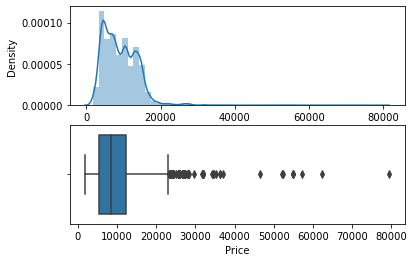

In [200]:
plot(data_train,'Price')

### Dealing with Outliers

In [201]:
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


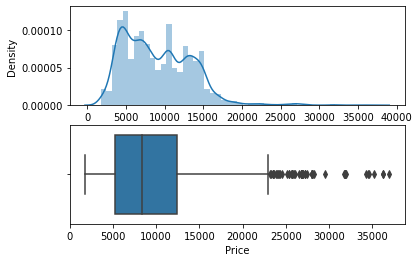

In [202]:
plot(data_train,'Price')

In [203]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [204]:
X.shape

(10682, 34)

In [205]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Feature Selection

In [206]:
from sklearn.feature_selection import mutual_info_classif

In [207]:
mutual_info_classif(X,y)

array([2.10650645, 2.06682437, 2.7788727 , 2.3078074 , 1.47566443,
       0.71316618, 0.75984673, 0.09939137, 0.66870693, 0.92364799,
       0.00660006, 0.57322977, 0.00701935, 0.32011491, 0.00412375,
       0.22247412, 0.        , 0.16090354, 1.57197898, 0.87112092,
       0.30067818, 1.49928746, 0.40074881, 0.28896609, 0.18088222,
       0.36931238, 1.09100768, 0.85208686, 1.44573051, 1.22037253,
       1.84199914, 1.48905029, 1.78177396, 1.08391009])

In [208]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.131504
Route_1,2.035348
Route_2,2.740585
Route_3,2.322768
Route_4,1.478961
Route_5,0.707414
Air India,0.763027
GoAir,0.103944
IndiGo,0.653032
Jet Airways,0.927761


In [209]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.740585
Route_3,2.322768
Total_Stops,2.131504
Route_1,2.035348
Arrival_Time_hour,1.856459
Duration_hours,1.789447
Arrival_Time_minute,1.537525
Delhi,1.536402
Cochin,1.531851
Route_4,1.478961


##### Split data into train & test

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [212]:
from sklearn import metrics

In [213]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are :\n {}'.format(y_prediction))
    print('\n')
    r2_score= metrics.r2_score(y_test,y_prediction)
    print('r2_score is : {}'.format(r2_score))
    print('MAE :' , metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE :' , metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE :' , np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.displot(y_test-y_prediction)

##### import Randomforest class

In [214]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9524612443222205
predictions are :
 [ 5149.65       10492.88       14514.45       ...  6888.54
  3892.556       3866.37833333]


r2_score is : 0.8304964512363253
MAE : 1143.4890214253978
MSE : 3133287.3254604633
RMSE : 1770.109410590335


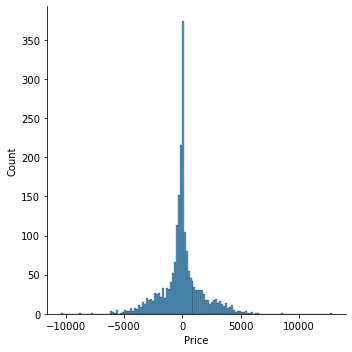

In [215]:
predict(RandomForestRegressor())

##### Multiple Algorithms

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6157566493149744
predictions are :
 [ 8489.70683328  9842.54445961 11720.71196527 ...  8697.57342535
  4173.46868131  3846.56089363]


r2_score is : 0.6150020717685327
MAE : 1945.6611651497399
MSE : 7116719.016532537
RMSE : 2667.71794171208


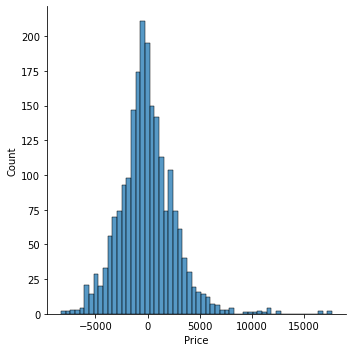

In [217]:
predict(LinearRegression())

Training score : 0.9667436768114129
predictions are :
 [ 4544. 12192. 14848. ...  6270.  3873.  3841.]


r2_score is : 0.7445002832896219
MAE : 1295.2096474808923
MSE : 4722933.707680159
RMSE : 2173.231167565972


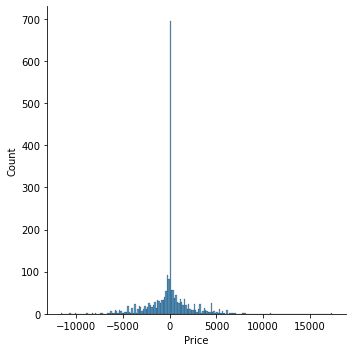

In [218]:
predict(DecisionTreeRegressor())

Training score : 0.7748653294841501
predictions are :
 [ 6454.6  9114.2 12761.6 ...  8027.2  3860.2  4157.2]


r2_score is : 0.6769727598447652
MAE : 1699.0757136172203
MSE : 5971185.646195602
RMSE : 2443.6009588710676


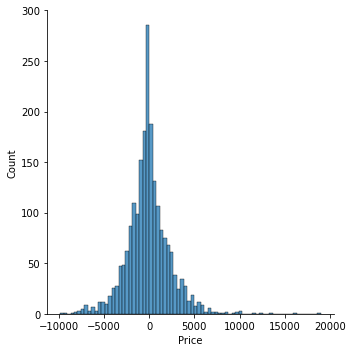

In [219]:
predict(KNeighborsRegressor())

##### Hyperparameter Tuning

In [220]:
from sklearn.model_selection import RandomizedSearchCV

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
reg_rf=RandomForestRegressor()

In [223]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [224]:
# Create the random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [225]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [226]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [227]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [228]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [229]:
prediction=rf_random.predict(X_test)

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

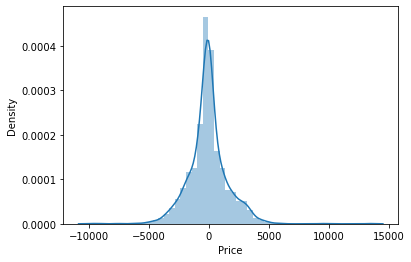

In [230]:
sns.distplot(y_test-prediction)

In [231]:
metrics.r2_score(y_test,prediction)

0.8594889130635431

##### Save the model to reuse it again

In [232]:
file=open('rf_random.pkl','wb')

In [233]:
pickle.dump(rf_random,file)